
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       484
           1       0.76      0.72      0.74       301

    accuracy                           0.81       785
   macro avg       0.80      0.79      0.79       785
weighted avg       0.81      0.81      0.81       785



c:\Users\vasud\anaconda3\envs\college\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:46:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       484
           1       0.76      0.72      0.74       301

    accuracy                           0.81       785
   macro avg       0.80      0.79      0.80       785
weighted avg       0.81      0.81      0.81       785

[LightGBM] [Info] Number of positive: 2133, number of negative: 3438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 5571, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382876 -> initscore=-0.477360
[LightGBM] [Info] Start training from score -0.477360

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       484
        

c:\Users\vasud\anaconda3\envs\college\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\vasud\anaconda3\envs\college\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       484
           1       0.76      0.71      0.73       301

    accuracy                           0.80       785
   macro avg       0.79      0.79      0.79       785
weighted avg       0.80      0.80      0.80       785


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       484
           1       0.76      0.70      0.73       301

    accuracy                           0.80       785
   macro avg       0.79      0.78      0.78       785
weighted avg       0.80      0.80      0.80       785


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       484
           1       0.77      0.68      0.72       301

    accuracy                           0.80       785
   macro 

c:\Users\vasud\anaconda3\envs\college\Lib\site-packages\shap\explainers\_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


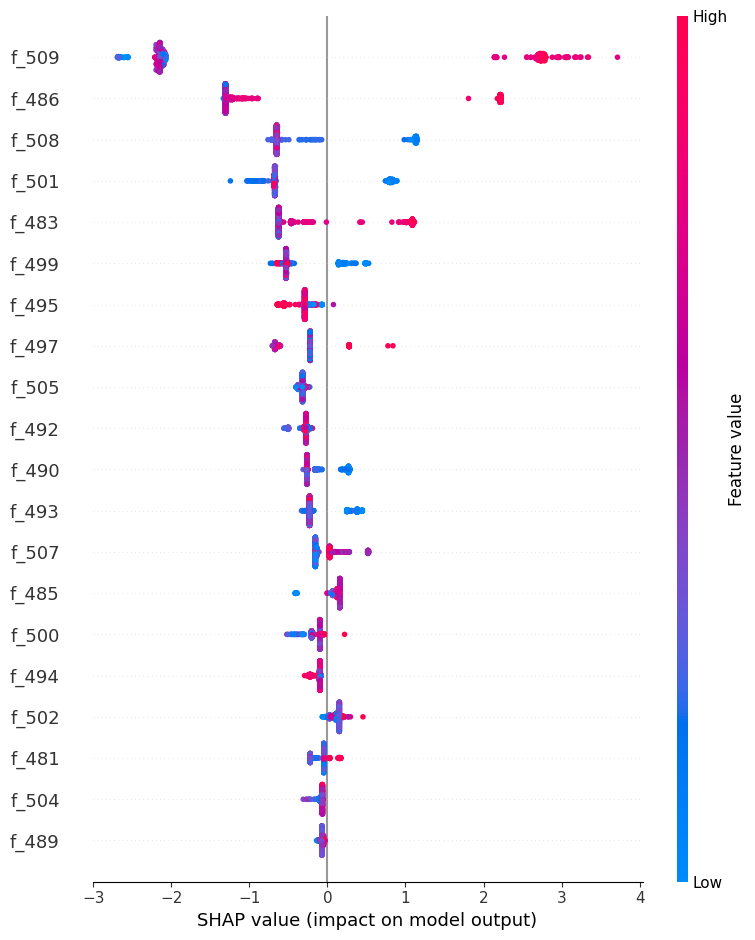

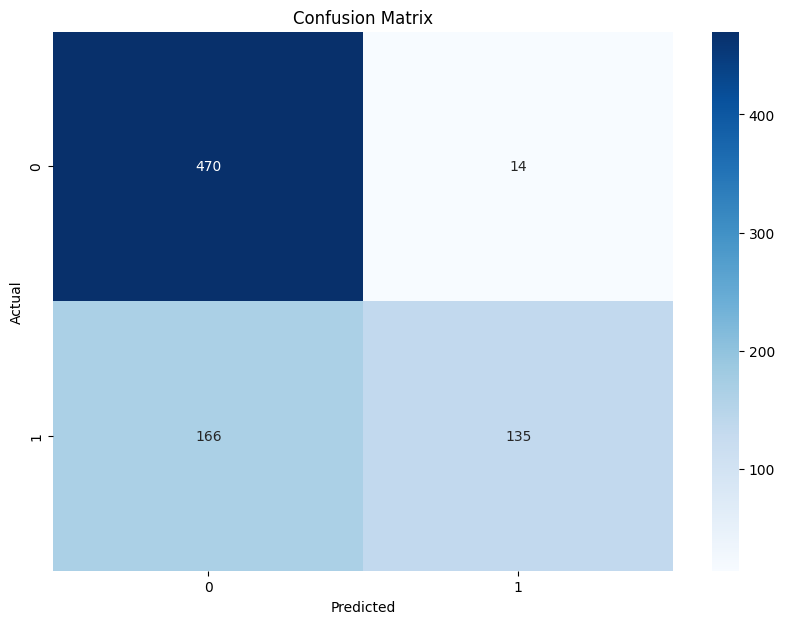

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, matthews_corrcoef, balanced_accuracy_score, confusion_matrix,
    classification_report, cohen_kappa_score, brier_score_loss, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, 
    ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, SGDClassifier, 
    Perceptron, PassiveAggressiveClassifier
)
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import shap

# Load and preprocess data
def load_data():
    train_df = pd.read_csv("size 512/google bert/train_512_features")
    dev_df = pd.read_csv("size 512/google bert/dev_512_features")
    
    X_train = train_df.drop(columns=['id', 'label'])
    y_train = train_df['label']
    X_test = dev_df.drop(columns=['id', 'label'])
    y_test = dev_df['label']
    
    return X_train, y_train, X_test, y_test

# Main evaluation function
def evaluate_models(X_train, y_train, X_test, y_test):
    # Preprocessing
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    n_classes = len(label_encoder.classes_)
    y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(n_classes)) if n_classes > 2 else None

    # Model definitions
    models = {
        "Tree-Based": {
            "Random Forest": RandomForestClassifier(),
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
            "LightGBM": LGBMClassifier(),
            "CatBoost": CatBoostClassifier(verbose=0),
            "Gradient Boosting": GradientBoostingClassifier()
        },
        "Linear Models": {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Ridge Classifier": RidgeClassifier(),
            "SGD Classifier": SGDClassifier()
        },
        "Other": {
            "SVM (RBF)": SVC(kernel='rbf', probability=True),
            "KNN": KNeighborsClassifier(),
            "AdaBoost": AdaBoostClassifier()
        }
    }

    results = {}
    fitted_models = {}
    for category in models:
        for name, model in models[category].items():
            try:
                model.fit(X_train_scaled, y_train_encoded)
                fitted_models[name] = model
                y_pred = model.predict(X_test_scaled)
                y_prob = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None
                
                # Calculate metrics
                metrics = {
                    "Accuracy": accuracy_score(y_test_encoded, y_pred),
                    "Precision": precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0),
                    "Recall": recall_score(y_test_encoded, y_pred, average='weighted', zero_division=0),
                    "F1": f1_score(y_test_encoded, y_pred, average='weighted'),
                    "ROC AUC": roc_auc_score(
                        y_test_encoded, 
                        y_prob, 
                        multi_class='ovr'
                    ) if y_prob is not None and n_classes > 2 else None
                }
                
                # Add probability-based metrics
                if y_prob is not None:
                    metrics.update({
                        "Log Loss": log_loss(y_test_encoded, y_prob),
                        "Brier Score": brier_score_loss(y_test_encoded, y_prob[:, -1]) 
                            if n_classes == 2 else None
                    })
                
                results[name] = metrics
                
                print(f"\n{name} Classification Report:")
                print(classification_report(y_test_encoded, y_pred))
                
            except Exception as e:
                print(f"Error with {name}: {str(e)}")
    
    return pd.DataFrame(results).T.sort_values(by="F1", ascending=False), fitted_models

# Visualization functions
def plot_shap_summary(model, X_test, feature_names):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)

def plot_confusion_matrix(model, X_test, y_test, classes):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Main execution
if __name__ == "__main__":
    X_train, y_train, X_test, y_test = load_data()
    results_df, fitted_models = evaluate_models(X_train, y_train, X_test, y_test)

    print("\nModel Performance Summary:")
    print(results_df)

    best_model_name = results_df.index[0]
    best_model = fitted_models[best_model_name]
    
    # Plot explanations
    plot_shap_summary(best_model, X_test, X_train.columns)
    plot_confusion_matrix(best_model, X_test, y_test, fitted_models[best_model_name].classes_)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, matthews_corrcoef, balanced_accuracy_score, confusion_matrix,
    classification_report, cohen_kappa_score, brier_score_loss, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, 
    ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, SGDClassifier, 
    Perceptron, PassiveAggressiveClassifier
)
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import shap

# Load and preprocess data
def load_data():
    train_df = pd.read_csv("size 512/google bert/train_512_features")
    dev_df = pd.read_csv("size 512/google bert/dev_512_features")
    
    X_train = train_df.drop(columns=['id', 'label'])
    y_train = train_df['label']
    X_test = dev_df.drop(columns=['id', 'label'])
    y_test = dev_df['label']
    
    return X_train, y_train, X_test, y_test

# Main evaluation function
def evaluate_models(X_train, y_train, X_test, y_test):
    # Preprocessing
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    n_classes = len(label_encoder.classes_)
    y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(n_classes)) if n_classes > 2 else None

    # Model definitions
    models = {
        "Tree-Based": {
            "Random Forest": RandomForestClassifier(),
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
            "LightGBM": LGBMClassifier(),
            "CatBoost": CatBoostClassifier(verbose=0),
            "Gradient Boosting": GradientBoostingClassifier()
        },
        "Linear Models": {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Ridge Classifier": RidgeClassifier(),
            "SGD Classifier": SGDClassifier()
        },
        "Other": {
            "SVM (RBF)": SVC(kernel='rbf', probability=True),
            "KNN": KNeighborsClassifier(),
            "AdaBoost": AdaBoostClassifier()
        }
    }

    results = {}
    fitted_models = {}
    for category in models:
        for name, model in models[category].items():
            try:
                model.fit(X_train_scaled, y_train_encoded)
                # store the fitted model
                fitted_models[name] = model
                y_pred = model.predict(X_test_scaled)
                y_prob = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None
                
                # Calculate metrics
                metrics = {
                    "Accuracy": accuracy_score(y_test_encoded, y_pred),
                    "Precision": precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0),
                    "Recall": recall_score(y_test_encoded, y_pred, average='weighted', zero_division=0),
                    "F1": f1_score(y_test_encoded, y_pred, average='weighted'),
                    "ROC AUC": roc_auc_score(
                        y_test_encoded, 
                        y_prob, 
                        multi_class='ovr'
                    ) if y_prob is not None and n_classes > 2 else None
                }
                
                # Add probability-based metrics
                if y_prob is not None:
                    metrics.update({
                        "Log Loss": log_loss(y_test_encoded, y_prob),
                        "Brier Score": brier_score_loss(y_test_encoded, y_prob[:, -1]) 
                            if n_classes == 2 else None
                    })
                
                results[name] = metrics
                
                print(f"\n{name} Classification Report:")
                print(classification_report(y_test_encoded, y_pred))
                
            except Exception as e:
                print(f"Error with {name}: {str(e)}")
    
    return pd.DataFrame(results).T.sort_values(by="F1", ascending=False), fitted_models

# Visualization functions
def plot_shap_summary(model, X_test, feature_names):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)

def plot_confusion_matrix(model, X_test, y_test, classes):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

if __name__ == "__main__":
    X_train, y_train, X_test, y_test = load_data()
    results_df, fitted_models = evaluate_models(X_train, y_train, X_test, y_test)

    print("\nModel Performance Summary:")
    print(results_df)

    best_model_name = results_df.index[0]
    best_model = fitted_models[best_model_name]

    # now you can plot SHAP, confusion matrices, etc.
    plot_shap_summary(best_model, X_test, X_train.columns)
    plot_confusion_matrix(best_model, X_test, y_test, fitted_models[best_model_name].classes_)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, matthews_corrcoef, balanced_accuracy_score, confusion_matrix,
    classification_report, cohen_kappa_score, brier_score_loss, roc_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, 
    ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, SGDClassifier, 
    Perceptron, PassiveAggressiveClassifier
)
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import shap

# Load and preprocess data
def load_data():
    train_df = pd.read_csv("size 512/indic bert/train_512_features")
    dev_df = pd.read_csv("size 512/indic bert/dev_512_features")
    
    X_train = train_df.drop(columns=['id', 'label'])
    y_train = train_df['label']
    X_test = dev_df.drop(columns=['id', 'label'])
    y_test = dev_df['label']
    
    return X_train, y_train, X_test, y_test

# Main evaluation function
def evaluate_models(X_train, y_train, X_test, y_test):
    # Preprocessing
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    n_classes = len(label_encoder.classes_)
    y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(n_classes)) if n_classes > 2 else None

    # Model definitions
    models = {
        "Tree-Based": {
            "Random Forest": RandomForestClassifier(),
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
            "LightGBM": LGBMClassifier(),
            "CatBoost": CatBoostClassifier(verbose=0),
            "Gradient Boosting": GradientBoostingClassifier()
        },
        "Linear Models": {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Ridge Classifier": RidgeClassifier(),
            "SGD Classifier": SGDClassifier()
        },
        "Other": {
            "SVM (RBF)": SVC(kernel='rbf', probability=True),
            "KNN": KNeighborsClassifier(),
            "AdaBoost": AdaBoostClassifier()
        }
    }

    results = {}
    
    for category in models:
        for name, model in models[category].items():
            try:
                model.fit(X_train_scaled, y_train_encoded)
                y_pred = model.predict(X_test_scaled)
                y_prob = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None
                
                # Calculate metrics
                metrics = {
                    "Accuracy": accuracy_score(y_test_encoded, y_pred),
                    "Precision": precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0),
                    "Recall": recall_score(y_test_encoded, y_pred, average='weighted', zero_division=0),
                    "F1": f1_score(y_test_encoded, y_pred, average='weighted'),
                    "ROC AUC": roc_auc_score(
                        y_test_encoded, 
                        y_prob, 
                        multi_class='ovr'
                    ) if y_prob is not None and n_classes > 2 else None
                }
                
                # Add probability-based metrics
                if y_prob is not None:
                    metrics.update({
                        "Log Loss": log_loss(y_test_encoded, y_prob),
                        "Brier Score": brier_score_loss(y_test_encoded, y_prob[:, -1]) 
                            if n_classes == 2 else None
                    })
                
                results[name] = metrics
                
                print(f"\n{name} Classification Report:")
                print(classification_report(y_test_encoded, y_pred))
                
            except Exception as e:
                print(f"Error with {name}: {str(e)}")
    
    return pd.DataFrame(results).T.sort_values(by="F1", ascending=False)

# Visualization functions
def plot_shap_summary(model, X_test, feature_names):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)

def plot_confusion_matrix(model, X_test, y_test, classes):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Main execution
if __name__ == "__main__":
    X_train, y_train, X_test, y_test = load_data()
    results_df = evaluate_models(X_train, y_train, X_test, y_test)
    
    print("\nModel Performance Summary:")
    print(results_df)
    
    best_model_name = results_df.index[0]
    best_model = models[best_model_name]
    
    # Plot explanations
    plot_shap_summary(best_model, X_test, X_train.columns)
    plot_confusion_matrix(best_model, X_test, y_test, label_encoder.classes_)
